In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
sns.set()

In [49]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

In [4]:
def kernel(x, x0, w):
    x = x - x0
    return ((x < w) * (x > 0)).astype(float)


def linear_kernel(x, x0, w):
    x = x - x0
    x = x / w
    return ((1 - np.abs(x)) * (np.abs(x) < 1)).astype(float)


def sinc_kernel(x, x0: float, w: float, alpha: float = np.inf):
    x = x - x0
    x = x / w
    return (x >= -alpha) * (x < alpha) * np.sinc(x)


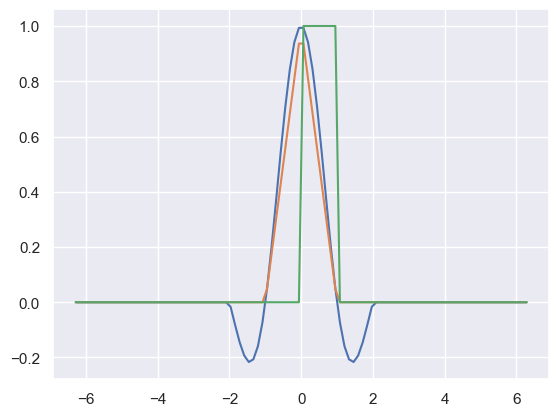

In [50]:
xk = np.linspace(-2 * np.pi, 2 * np.pi, 100)
plt.plot(xk, sinc_kernel(xk, x0=0, w=1, alpha=2))
plt.plot(xk, linear_kernel(xk, x0=0, w=1))
plt.plot(xk, kernel(xk, x0=0, w=1))

In [6]:
w = np.diff(x)[0]
w

0.12693303650867893

# **Funkcja sin(x)**

In [7]:
y_sinus = np.sin(x)

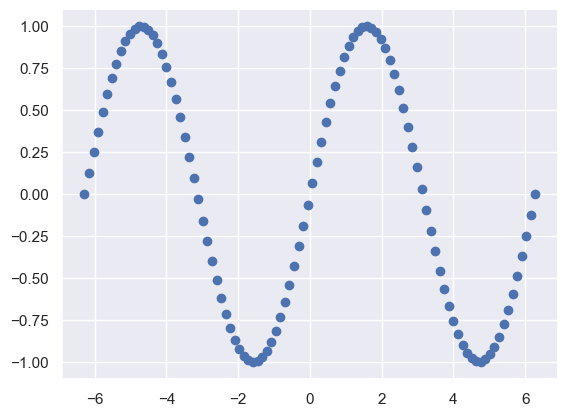

In [8]:
plt.scatter(x, y_sinus)

In [9]:
kernels = []

for xsample, ysample in zip(x, y_sinus):
    xk = np.linspace(-2 * np.pi, 2 * np.pi, 200)
    k = ysample * kernel(xk, x0=xsample, w=w)
    kernels.append(k)

In [10]:
kernels = np.asarray(kernels)
kernels.shape

(100, 200)

In [11]:
yinterp = kernels.sum(axis=0)

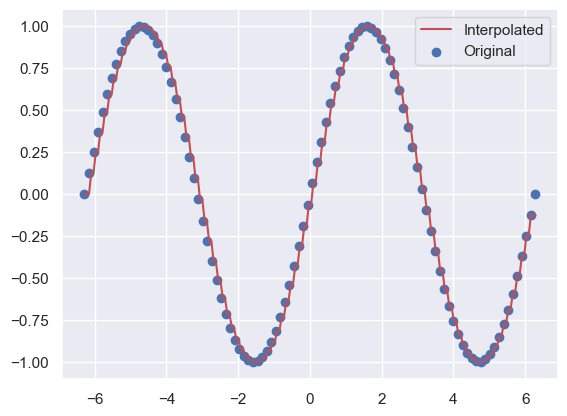

In [12]:
plt.plot(xk, yinterp, color = 'r', label = 'Interpolated')
plt.scatter(x, y_sinus, label = 'Original')
plt.legend()

In [13]:
f"{(mean_squared_error(yinterp, np.sin(xk)) / np.std(np.sin(xk))):.4%}"

'0.3879%'

# **Funkcja $sin(x^{-1})$**

In [14]:
y_inv = np.sin(np.power(x, -1))

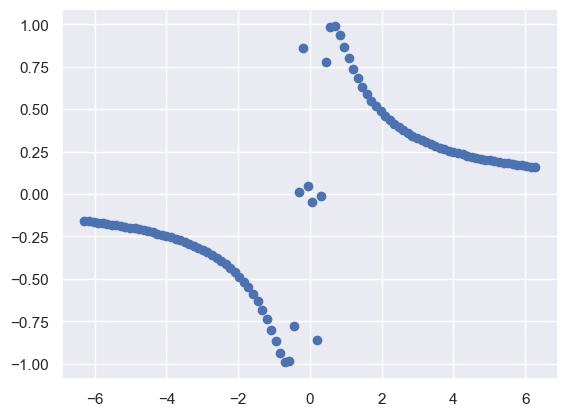

In [15]:
plt.scatter(x, y_inv)

In [16]:
kernels = []

for xsample, ysample in zip(x, y_inv):
    xk = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    k = ysample * linear_kernel(xk, x0=xsample, w=w)
    kernels.append(k)

In [17]:
kernels = np.asarray(kernels)
kernels.shape

(100, 1000)

In [18]:
yinterp = kernels.sum(axis=0)

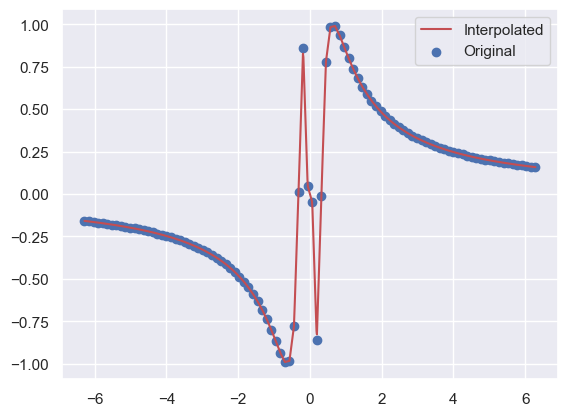

In [19]:
plt.plot(xk, yinterp, color = 'r', label = 'Interpolated')
plt.scatter(x, y_inv, label = 'Original')
plt.legend()

In [20]:
f"{(mean_squared_error(yinterp, np.sin(np.power(xk, -1))) / np.std(np.sin(np.power(xk, -1)))):.4%}"

'4.3948%'

# **Funkcja $sgn(sin{8x})$**

In [51]:
y_sgn = np.sign(np.sin(8*x))

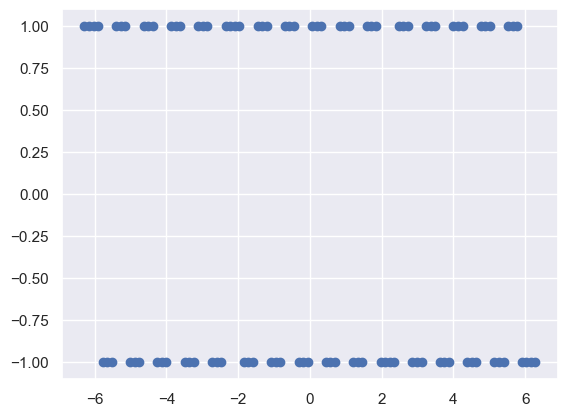

In [52]:
plt.scatter(x, y_sgn)

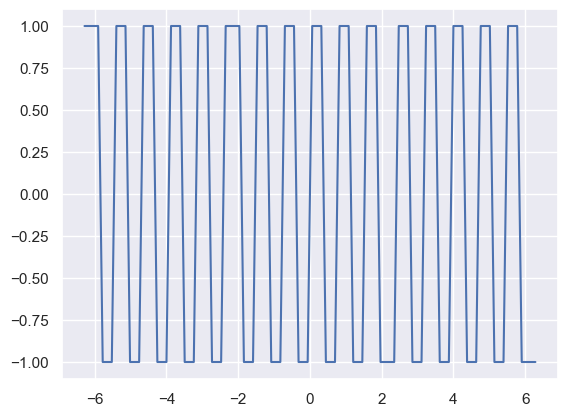

In [63]:
plt.plot(x, y_sgn)

In [86]:
kernels = []

for xsample, ysample in zip(x, y_sgn):
    xk = np.linspace(-2 * np.pi, 2 * np.pi, 400)
    k = ysample * sinc_kernel(xk, x0=xsample, w=w, alpha=np.pi)
    kernels.append(k)


In [87]:
kernels = np.asarray(kernels)
kernels.shape

(100, 400)

In [88]:
yinterp = kernels.sum(axis=0)

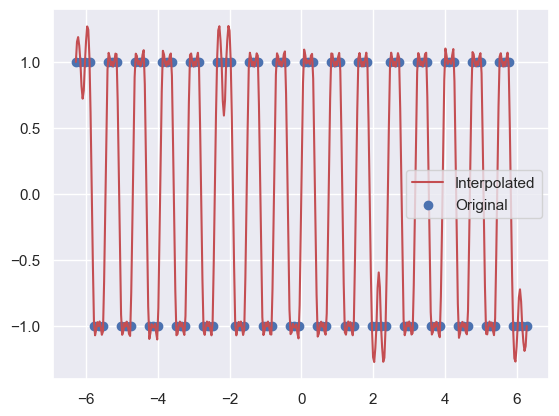

In [89]:
plt.plot(xk, yinterp, color = 'r', label = 'Interpolated')
plt.scatter(x, y_sgn, label = 'Original')
plt.legend()

In [90]:
f"{(mean_squared_error(yinterp, np.sign(np.sin(8*xk))) / np.std(np.sign(np.sin(8*xk)))):.4%}"

'20.1483%'